# Introduccion a Torch
HORA 5/6 - ¡Introducción a PyTorch! (Parte 1) - #100HorasDeML - Dot CSV
https://pytorch.org/tutorials/index.html

https://www.youtube.com/watch?v=kP142vtCNrA&ab_channel=NotCSV

In [ ]:
import torch
import numpy as np
torch.__version__

'1.13.1+cu116'

## Definicion de variables y operaciones basicas

In [ ]:
s = torch.empty([3,3])
w = torch.zeros([3,3])
x = torch.tensor([5.5,3])
print(s,w,x)
x.dtype

y = torch.tensor([6,4])
z = x + y

tensor([[1.2943e-34, 0.0000e+00, 3.5032e-44],
        [0.0000e+00,        nan, 0.0000e+00],
        [1.1578e+27, 7.1463e+22, 4.6241e+30]]) tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]) tensor([5.5000, 3.0000])


In [ ]:
# result = torch.empty(5,3)
# torch.add(x,y, out = result)
# print(result)
# x.add_(x)
print(x[0:2], z[0:2], z[0:1])
x[0:1][0], x[0] , x[0].item()

tensor([5.5000, 3.0000]) tensor([11.5000,  7.0000]) tensor([11.5000])


(tensor(5.5000), tensor(5.5000), 5.5)

- *Al transformar un tensor a numpy, estos se modifican en simultaneo*


In [ ]:
A = x.numpy()
print("Tensor a numpy {}".format(A))

c = A.copy()
print("copia numpy {}".format(c))

x.add_(1)
print("Arreglo numpy tras sumarle 1 al tensor x: {}".format(A))
print("copia numpy {}".format(c))


a = np.ones(5)
b = torch.from_numpy(a)
print("Arreglo numpy creado: {} \n Tensor copia: {}".format(a, b))
np.add(a, 1, out = a)
print("Arreglo numpy sumando 1: {} \n Tensor copia: {}".format(a, b))

torch.randn((16, 3, 3)).flatten(start_dim=1).size()

Tensor a numpy [5.5 3. ]
copia numpy [5.5 3. ]
Arreglo numpy tras sumarle 1 al tensor x: [6.5 4. ]
copia numpy [5.5 3. ]
Arreglo numpy creado: [1. 1. 1. 1. 1.] 
 Tensor copia: tensor([1., 1., 1., 1., 1.], dtype=torch.float64)
Arreglo numpy sumando 1: [2. 2. 2. 2. 2.] 
 Tensor copia: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


## Autograd: automatic differentiation

Pytorch esta orientada a Deep Learning.

Te abstrae de hacer calculos de derivada, por lo que te permite construir estructuras diferenciables.
- seguimiento de operaciones y automatizacion
- variacion de error respecto a un parametro

In [ ]:
x = torch.ones(2, 2, requires_grad=True ) ## X
print(x)
print(x.grad)
y = x + 2 ## Y
print(y.grad)

z = y * y * 3 ## Z
out = z.mean()  ## OUT

print(z, out)


tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
None
None
tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


<ipython-input-10-73f1b3ea7d39>:5: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:480.)
  print(y.grad)


In [ ]:
a = torch.randn(2,2)
a = ( (a * 3) / (a - 1) )
print(a.requires_grad)
a.requires_grad_(True)
print(a.requires_grad)
b = (a * a).sum()
print(b.grad_fn)

False
True


Backpropagation

In [ ]:
out.backward()
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


In [ ]:
x = torch.randn(3, requires_grad=True)
y = x * 2
while y.data.norm() < 1000:
  y = y * 2
  print("Norma: {}".format(y.data.norm()))
print(y)

Norma: 5.351867198944092
Norma: 10.703734397888184
Norma: 21.407468795776367
Norma: 42.814937591552734
Norma: 85.62987518310547
Norma: 171.25975036621094
Norma: 342.5195007324219
Norma: 685.0390014648438
Norma: 1370.0780029296875
tensor([-940.1823,  168.7370, -982.1909], grad_fn=<MulBackward0>)


tensor(1370.0780)

In [ ]:
v = torch.tensor( [0.1, 1.0, 0.0001], dtype=torch.float )
y.backward(v)

print(x.grad)

tensor([1.0240e+02, 1.0240e+03, 1.0240e-01])


In [ ]:
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():
  print((x ** 2).requires_grad)


True
True
False


In [ ]:
print(x.requires_grad)

y = x.detach()
print(y.requires_grad)
print(x.eq(y).all())

True
False
tensor(True)


# Video \# 6 Como hacer una Neural Nertwork

Now that you had a glimpse of autograd, nn depends on autograd to define models and differentiate them. An nn.Module contains layers, and a method forward(input) that returns the output.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 5*5 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square, you can specify with a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [ ]:
params = list(net.parameters())
print(len(params))
print(params[0].size())

10
torch.Size([6, 1, 5, 5])


In [ ]:
input = torch.randn(1, 1, 32, 32)
print(input)
output = net(input)
output

net.zero_grad()
output.backward(torch.randn(1, 10))

tensor([[[[ 0.0438, -0.6130, -2.4621,  ...,  0.0262,  0.5822, -0.4211],
          [ 0.2657, -0.5446, -1.8964,  ...,  0.1933, -1.0900,  0.7119],
          [ 0.3718,  0.2990, -0.7710,  ...,  1.6260, -0.8904, -0.6215],
          ...,
          [ 0.5248,  1.6339, -0.2046,  ...,  0.3757, -0.0683, -0.6262],
          [-1.6307, -1.0415, -1.3488,  ...,  0.1718,  0.5349, -0.6784],
          [-1.6300, -0.1461, -0.2595,  ..., -0.2590,  0.8008, -1.8483]]]])


Computo de Loss function

In [ ]:
output = net(input)
target = torch.randn(10)
target = target.view(1, -1)
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

print(loss.grad_fn)
print(loss.grad_fn.next_functions[0][0])
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])

tensor(0.7703, grad_fn=<MseLossBackward0>)


In [ ]:
net.zero_grad()

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)


conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])
conv1.bias.grad after backward
tensor([-0.0017,  0.0018, -0.0009, -0.0054,  0.0022, -0.0090])


Actualizacion de pesos: descenso de gradiente

In [ ]:
learning_rate = 0.01
for f in net.parameters():
  f.data.sub_(f.grad.data * learning_rate) #.sub_ resta in-situ

In [ ]:
import torch.optim as optim
optimizer = optim.SGD(net.parameters(), lr=0.01)

optimizer.zero_grad()
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()

# Test Autograd

In [ ]:
import torch
from torch.nn import Sequential, Linear, Tanh
from torch.autograd import grad

def autodiff(f, x, make_graph=True):
    return grad(f, x, torch.ones_like(f),retain_graph=True, create_graph=make_graph)[0]

# Set up NN 2 - 5 - 1
net = Sequential(Linear(2,5),
                 Tanh(),
                 Linear(5,1))

In [ ]:
# Working domain
x = torch.linspace(0,1,5)
y = torch.linspace(0,4,5)

# Grid

x_grid, y_grid = torch.meshgrid(x, y, indexing='xy')
x_grid.requires_grad_()
y_grid.requires_grad_()
x_grid.retain_grad()
y_grid.retain_grad()

# Flatten grid arrays
x_grid, y_grid = x_grid.flatten(), y_grid.flatten()

# One array

xy = torch.stack((x_grid, y_grid)).transpose(0,1)

In [ ]:
# Compute model over the grid

f = net(xy)

# Differentiate results

dx = autodiff(f, x_grid)
dy = autodiff(f, y_grid)

ddx = autodiff(dx, x_grid, make_graph=False)
ddy = autodiff(dy, y_grid, make_graph=False)

In [ ]:
print(x_grid.shape, dx.shape, ddx.shape, xy.shape, f.shape)
# print('x: {}\n dx: {} \n ddx: {} \n'.format(x, dx, ddx))
# print('y: {}\n dy: {} \n ddy: {} \n'.format(y, dy, ddy))
# print('xy: {} \n model: {}'.format(xy, f))

torch.Size([25]) torch.Size([25]) torch.Size([25]) torch.Size([25, 2]) torch.Size([25, 1])


# Interpolate

Model

In [ ]:
from itertools import islice
import numpy as np
from time import time
import torch
from torch import Tensor
from torch.nn import Sequential, Identity
from torch.autograd import grad
from torch.utils import data


class Interpolate:
  def __init__(self, layers, label=None):
    # build NN
    self.net = Sequential(*layers)
    self.label = label
    self.input_len = layers[0].in_features

  def __call__(self, x):
    # Tensor?
    if torch.is_tensor(x):
      return self.net(x).detach().numpy()
    # Numpy ?
    elif isinstance(x, np.ndarray):
      if x.shape == (self.input_len, ):
        return self.net(Tensor(x.astype('float64'))).detach().numpy()
      elif len(x[0]) == self.input_len and len(x) > 1:
        new_shape = (len(x), self.input_len)
        return self.net(Tensor(x.reshape(new_shape))).detach().numpy()

  def add_loss_fn(self, loss_fn):
    self.loss_fn = loss_fn

  def add_optimizer(self, optimizer):
    self.optimizer = optimizer

  def train(self, epochs, train_set, val_set, quiet=False):
    history = {}
    for step in range(epochs):
      t0 = time()
      train_loss, val_loss = self.compute_training_step(train_set, val_set)
      history[f'Epoch{step+1}'] = {'tloss': train_loss,
                                   'vloss': val_loss}
      tf = time()
      if not quiet:
        print(f"Epoch {step+1}/{epochs}\n\n",
                      f"Training loss {train_loss}\n",
                      f"Validation loss {val_loss}\n",
                      "Time spent: {:.6f} seg\n".format(tf-t0),
                      "-------------------\n\n")
    return history

  def compute_training_step(self, train_set, val_set):
    # Training set
    train_loss, val_loss = 0, 0

    for x, f in train_set:

      # Compute Prediction and Loss
      pred = self.net(x)
      loss = self.loss_fn(pred, f)

      # Backpropagation
      self.optimizer.zero_grad()
      loss.backward()
      self.optimizer.step()

      train_loss += loss.item()

  # Validation set
    with torch.no_grad():
      # Compute prediction and loss
      for x, f in val_set:
        pred = self.net(x)
        val_loss += self.loss_fn(pred, f).item()
    return train_loss, val_loss

  def save_nn(self, path):
    torch.save(self.net.state_dict(), path)
    pass

  def load_nn(self, path):
    self.net.load_state_dict(torch.load(path))
    self.net.eval()
    pass

Tools

In [ ]:
##############################################################################
#               custom activation functions                                  #
##############################################################################
class AlgSigmoid(Identity):
  def __init__(self, r=4):
    Identity.__init__(self)
    self.r = r

  def forward(self, x: Tensor) -> Tensor:
    return x/(self.r + x ** 2) ** .5
##############################################################################
#               dataset handling                                             #
##############################################################################
def arrays_to_dataset(x, f, batch_size= 1, shuffle= False):
  xt, ft = Tensor(x), Tensor(f)
  dataset = data.TensorDataset(xt, ft)
  return data.DataLoader(dataset, batch_size, shuffle= shuffle)

def batch(iterable, batch_size):
    iterator = iter(iterable)
    while batch := list(islice(iterator, batch_size)):
        yield batch


Target:
$$ f(x) = e^{-x^2}sin(2x) $$

In [ ]:
import numpy as np
from torch import nn
import torch.optim as optim
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from time import time
sin, exp = np.sin, np.exp

# torch
dtype = float
device = 'cpu'
model_in = 1
model_out = 1

# TARGET FUNCTION :
def f(x): return exp(-.1*x**2)*sin(2*x)

In [ ]:
# Set up DATA

t_len, v_len = 500, 100
train_x, val_x = (np.linspace(-6,6, t_len).reshape(t_len, model_in),
                  np.linspace(-6,6, v_len).reshape(v_len, model_in))
train_y, val_y = f(train_x), f(val_x)
val_set = arrays_to_dataset(val_x, val_y, batch_size=v_len)

In [ ]:
# Set up training

training_configs = [{'lr': 1e-2, 'bs': 10, 'epochs': 100},
                    {'lr': 1e-3, 'bs': 10, 'epochs': 30},
                    {'lr': 1e-4, 'bs': 10, 'epochs': 30}]
def train_model(model, training_configs):
  t0 = time()
  hists = []
  for config_dict in training_configs:
    lr = config_dict['lr']
    epochs = config_dict['epochs']
    batch_size = config_dict['bs']
    optimizer = optim.Adam(model.net.parameters(), lr=lr)
    model.add_optimizer(optimizer)
    train_set = arrays_to_dataset(train_x, train_y,
                                  batch_size=batch_size, shuffle = True)
    hists.append(model.train(epochs, train_set, val_set, quiet= False))

  tloss, vloss = [], []
  for hist in hists:
    for epoch in hist:
      d = hist[epoch]
      tloss.append(d['tloss'])
      vloss.append(d['vloss'])
  epochs = range(len(tloss))
  tf = time()
  print('Training finished. Time spent : {:.6f} seg.'.format((tf-t0)))
  return epochs, tloss, vloss

  h_nodes = 20

  model = Interpolate([nn.Tanh(model_in, h_nodes), AlgSigmoid(r=4),
                       nn.Tanh(h_nodes, h_nodes), AlgSigmoid(r=1),
                       nn.Tanh(h_nodes, model_out)],
                      label='asig')

  #Loss
  loss_fn = nn.L1Loss()
  model.add_loss_fn(loss_fn)

  #train model

  epochs, tloss, vloss = train_model(model, training_configs)

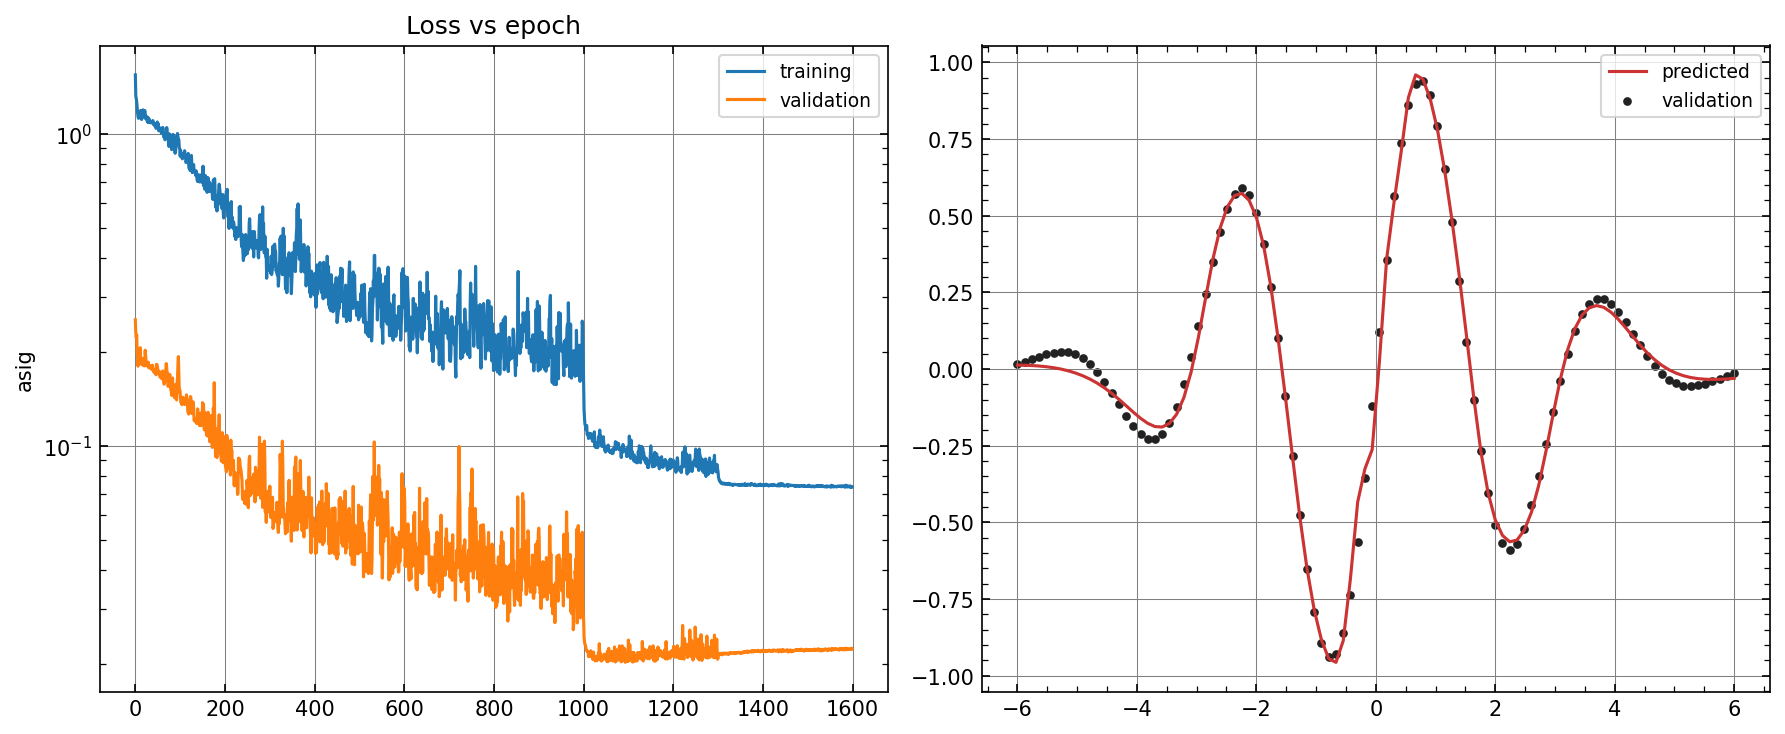

In [ ]:
## Plot model
fig, axes = plt.subplots(1, 2, figsize=(12, 5), dpi=150)
# plot training
axes[0].plot(epochs, tloss, label='training')
axes[0].plot(epochs, vloss, label='validation')
axes[0].set_title('Loss vs epoch')
axes[0].set_ylabel(model.label)
axes[0].set_yscale('log')

# plot results
axes[1].plot(val_x, model(val_x), color='#c33', label='predicted')
axes[1].scatter(val_x, val_y, color='#222', label='validation', s=10)

axes[1].xaxis.set_minor_locator(AutoMinorLocator())
axes[1].yaxis.set_minor_locator(AutoMinorLocator())

# group config
for ax in axes:
    ax.tick_params(which='both', direction='in', top=True, right=True)
    ax.tick_params(which='major', width=.8, length=4)
    ax.tick_params(which='minor', width=.6, length=3)
    ax.grid(color='grey', linestyle='-', linewidth=.5)
    ax.legend(fontsize=9)

# end
fig.tight_layout()
plt.show()

Se truncaron las últimas líneas 5000 del resultado de transmisión.

 Training loss 0.00956727797165513
 Validation loss 0.002490776125341654
 Time spent: 0.110946 seg
 -------------------


Epoch 1777/2000

 Training loss 0.01090769877191633
 Validation loss 0.00240216962993145
 Time spent: 0.205010 seg
 -------------------


Epoch 1778/2000

 Training loss 0.010658170212991536
 Validation loss 0.0019149393774569035
 Time spent: 0.136095 seg
 -------------------


Epoch 1779/2000

 Training loss 0.009217323968186975
 Validation loss 0.0017985673621296883
 Time spent: 0.210453 seg
 -------------------


Epoch 1780/2000

 Training loss 0.010972990421578288
 Validation loss 0.0022085856180638075
 Time spent: 0.221286 seg
 -------------------


Epoch 1781/2000

 Training loss 0.009781910572201014
 Validation loss 0.0017603525193408132
 Time spent: 0.116645 seg
 -------------------


Epoch 1782/2000

 Training loss 0.008466586470603943
 Validation loss 0.002101433929055929
 Time spent: 0.21

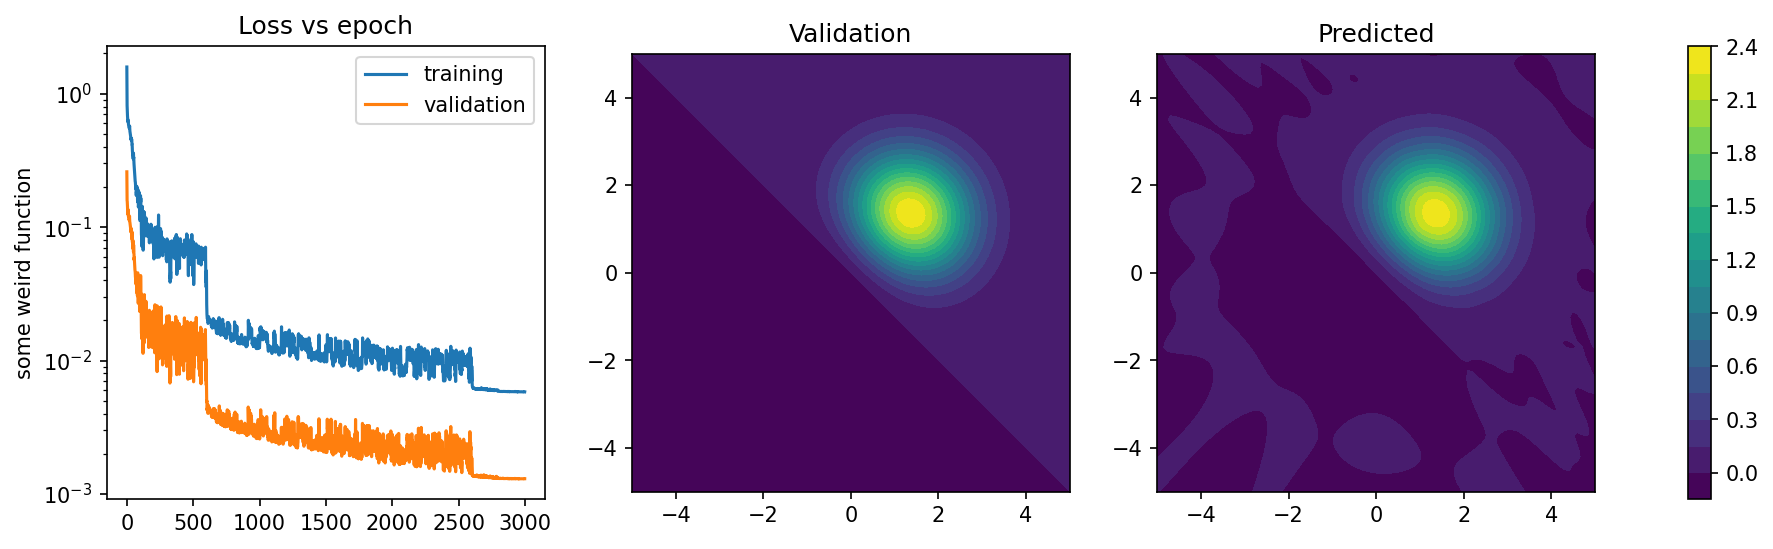

In [ ]:
# torch
dtype = float
device = 'cpu'
model_in = 2
model_out = 1


# target function
def f(x, y): return (x+y)*np.exp(-.5*((x-1)**2+(y-1)**2))


# set up data
alen = 101
X = np.linspace(-5, 5, alen)
Y = X.copy()

# set up training data
training_samples = 5000
train_x, train_f = [], []
for _ in range(training_samples):
    i, j = np.random.randint(0, alen, 2)
    x, y = X[i], Y[j]
    train_x.append((x, y))
    train_f.append(f(x, y))
train_x = np.array(train_x)
train_f = np.array(train_f).reshape(training_samples, model_out)

val_x, val_f = [], []
for i in range(alen):
    for j in range(alen):
        x, y = X[i], Y[j]
        val_x.append((x, y))
        val_f.append(f(x, y))
val_x = np.array(val_x)
val_f = np.array(val_f).reshape(alen**2, model_out)

val_set = arrays_to_dataset(val_x, val_f, batch_size=alen**2)


# set up training
training_configs = [{'lr': 1e-2, 'bs': 1000, 'epochs': 600},
                    {'lr': 1e-3, 'bs': 1000, 'epochs': 2000},
                    {'lr': 1e-4, 'bs': 1000, 'epochs': 200},
                    {'lr': 1e-5, 'bs': 1000, 'epochs': 200}]


def train_model(model, training_configs):
    t0 = time()
    hists = []
    for config_dict in training_configs:
        lr = config_dict['lr']
        epochs = config_dict['epochs']
        batch_size = config_dict['bs']
        optimizer = optim.Adam(model.net.parameters(), lr=lr)
        model.add_optimizer(optimizer)
        train_set = arrays_to_dataset(train_x, train_f,
                                      batch_size=batch_size, shuffle=True)
        hists.append(model.train(epochs, train_set, val_set, quiet=False))

    tloss, vloss = [], []
    for hist in hists:
        for epoch in hist:
            d = hist[epoch]
            tloss.append(d['tloss'])
            vloss.append(d['vloss'])
    epochs = range(len(tloss))
    tf = time()
    print('Training finished. Time spent: {:.2f} seg.'.format(tf-t0))
    return epochs, tloss, vloss


h_nodes = 50
model = Interpolate([nn.Linear(model_in, h_nodes), AlgSigmoid(r=4),
                    nn.Linear(h_nodes, h_nodes), AlgSigmoid(r=1),
                    nn.Linear(h_nodes, model_out)],
                   label='some weird function')


# set up loss
loss_fn = nn.L1Loss()
model.add_loss_fn(loss_fn)

# train model
epochs, tloss, vloss = train_model(model, training_configs)
model.save_nn('ff_model')

# process results

R = np.array([(x, y) for x in X for y in Y])

F_ = model(R).reshape((alen, alen))

X, Y = np.meshgrid(X, Y)
F = f(X, Y)

true_Fmin, true_Fmax = F.min(), F.max()
nn_Fmin, nn_Fmax = F_.min(), F_.max()
vmin, vmax = min(nn_Fmin, true_Fmin), max(nn_Fmax, true_Fmax)

# plot some stuff
fig, axes = plt.subplots(1, 3, figsize=(16, 4), dpi=150)
# plot training
axes[0].plot(epochs, tloss, label='training')
axes[0].plot(epochs, vloss, label='validation')
axes[0].set_title('Loss vs epoch')
axes[0].set_ylabel(model.label)
axes[0].set_yscale('log')
axes[0].legend()

# plot results
map1 = axes[1].contourf(X, Y, F, levels=20, cmap='viridis', vmin=vmin,
                        vmax=vmax)
axes[1].set_title('Validation')

map2 = axes[2].contourf(X, Y, F_, levels=20, cmap='viridis', vmin=vmin,
                        vmax=vmax)
axes[2].set_title('Predicted')

for ax in axes[1:]:
    ax.set_aspect('equal', adjustable='box')

fig.colorbar(mappable=map1, ax=axes.ravel().tolist())
# end
plt.show()

# Poisson Equation

https://en.wikipedia.org/wiki/Automatic_differentiation

https://en.wikipedia.org/wiki/Physics-informed_neural_networks

In [ ]:
##############################################################################
#                PINN
##############################################################################

class PINN:
    def __init__(self, layers, label=None):
        # build neural network
        self.net = Sequential(*layers)
        self.input_len = layers[0].in_features

        # label
        self.label = label

    def __call__(self, x):
        # test if tensor
        if torch.is_tensor(x):
            return self.net(x).detach().numpy()
        # test if numpy array
        elif isinstance(x, np.ndarray):
            return self.net(
                Tensor(x.reshape(len(x), self.input_len))).detach().numpy()

    def add_optimizer(self, optimizer):
        self.optimizer = optimizer

    def add_physics_loss(self, phys_loss):
        self.phys_loss = phys_loss

    def train(self, epochs, quiet=False):
        history = {}
        for step in range(1, epochs+1):
            t0 = time()
            train_loss = self.compute_training_step()
            history[f'Epoch {step}'] = {'tloss': train_loss}
            tf = time()
            if not quiet:
                print(f"Epoch {step}\n")
                print(f"Training loss {train_loss}")
                print("Time spent: {:.6f} seg".format(tf-t0))
                print("-------------------\n\n")
        return history

    def compute_training_step(self):
        # Compute physics informed loss
        loss = self.phys_loss(self)

        # Backpropagation
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        train_loss = loss.item()

        return train_loss

    def save_nn(self, path):
        torch.save(self.net.state_dict(), path)
        pass

    def load_nn(self, path):
        self.net.load_state_dict(torch.load(path))
        self.net.eval()
        pass
##############################################################################
#               PINN utils
##############################################################################

def autodiffable_domain(domain, shape=None):
    return Tensor(domain).requires_grad_()


def autodiff(f, x, make_graph=True): return grad(f, x, torch.ones_like(f),
                                                 retain_graph=True,
                                                 create_graph=make_graph)[0]

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([1600, 1])) that is different to the input size (torch.Size([1600, 1600])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Streaming output truncated to the last 5000 lines.

Epoch 9287

Training loss 9.256246812583413e-06
Time spent: 0.132480 seg
-------------------


Epoch 9288

Training loss 9.256325938622467e-06
Time spent: 0.139736 seg
-------------------


Epoch 9289

Training loss 9.256313205696642e-06
Time spent: 0.131353 seg
-------------------


Epoch 9290

Training loss 9.256413250113837e-06
Time spent: 0.145247 seg
-------------------


Epoch 9291

Training loss 9.256325938622467e-06
Time spent: 0.131676 seg
-------------------


Epoch 9292

Training loss 9.256352313968819e-06
Time spent: 0.137000 seg
-------------------


Epoch 9293

Training loss 9.256323210138362e-06
Time spent: 0.142513 seg
-------------------


Epoch 9294

Training loss 9.256331395590678e-06
Time spent: 0.151295 seg
-------------------


Epoch 9295

Training loss 9.256392331735697e-06
Time spent: 0.132324 seg
-------------------


Epoch 9296

Training loss 9.256361408915836e-06
Time spent: 0.137232 seg
-------------------


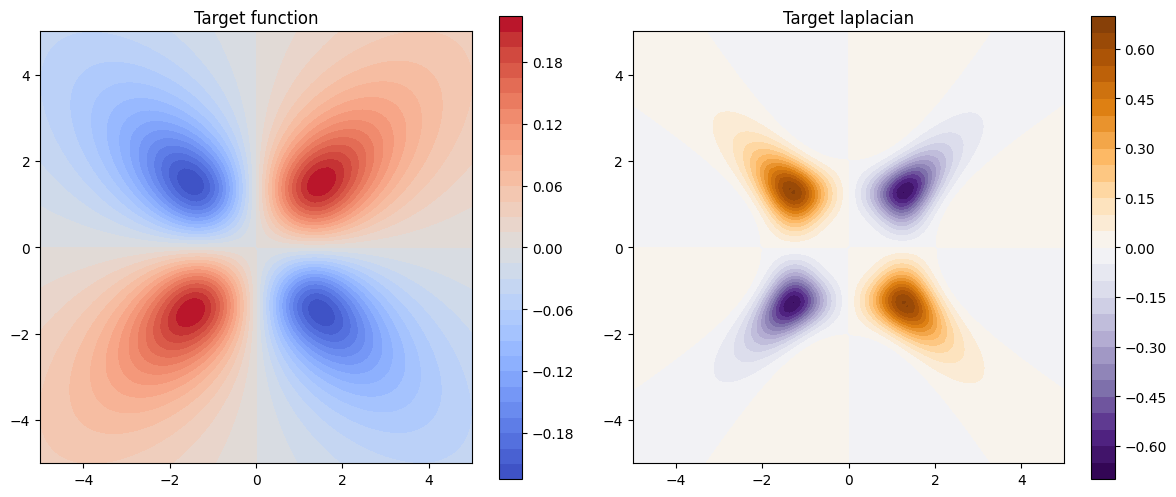

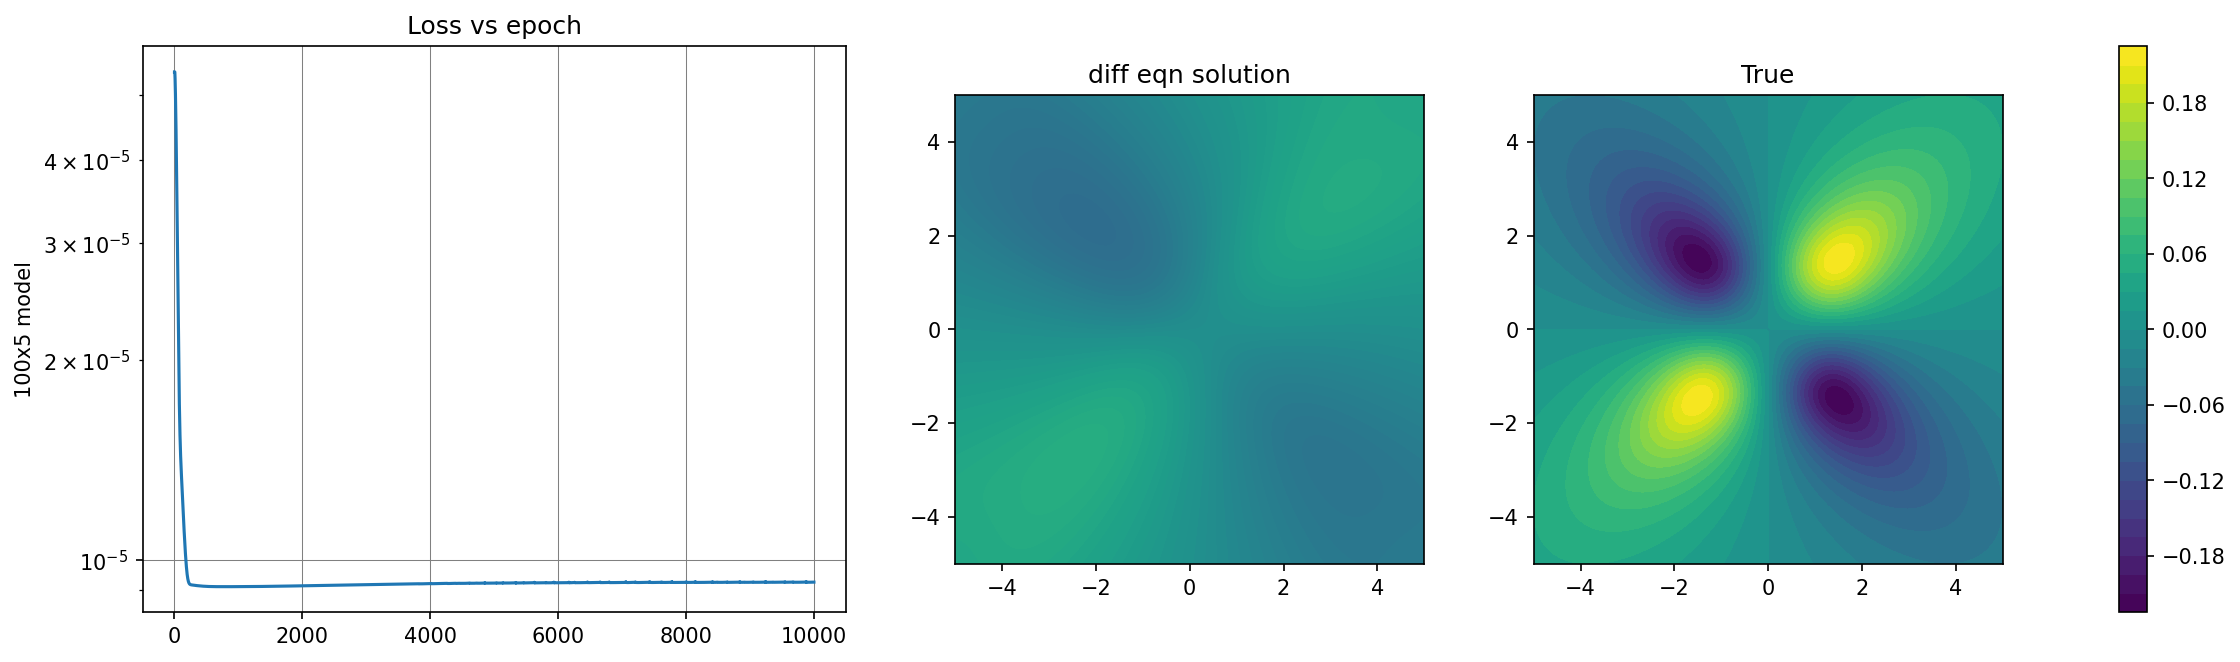

In [ ]:
import torch
from torch import nn, Tensor
from torch.optim import Adam
import numpy as np
from matplotlib.ticker import AutoMinorLocator
import matplotlib.pyplot as plt
from time import time
exp, cos = np.exp, np.cos


# torch
dtype = float
device = 'cpu'

# define model
model_in = 2
model_out = 1

hidden_nodes = 100
model = PINN([nn.Linear(model_in, hidden_nodes),
              nn.Linear(hidden_nodes, hidden_nodes), nn.Tanh(),
              nn.Linear(hidden_nodes, hidden_nodes), nn.Tanh(),
              nn.Linear(hidden_nodes, hidden_nodes), nn.Tanh(),
              nn.Linear(hidden_nodes, hidden_nodes), nn.Tanh(),
              nn.Linear(hidden_nodes, hidden_nodes), nn.Tanh(),
              nn.Linear(hidden_nodes, model_out)],
             label='100x5 model')

# set up training
training_configs = [{'lr': 1e-4, 'epochs': 10000}, ]


def train_model(model, training_configs):
    t0 = time()
    hists = []
    for config_dict in training_configs:
        lr = config_dict['lr']
        epochs = config_dict['epochs']
        optimizer = RAdam(model.net.parameters(), lr=lr)
        model.add_optimizer(optimizer)
        hists.append(model.train(epochs, quiet=False))

    tloss = []
    for hist in hists:
        for epoch in hist:
            d = hist[epoch]
            tloss.append(d['tloss'])
    epochs = range(len(tloss))
    tf = time()
    print('Training finished. Time spent: {:.6f} seg.'.format(tf-t0))
    return epochs, tloss


# loss computing
loss_fn = nn.MSELoss()   # nn.MSELoss()


# domain arrays
x0, xf, nx = -5, 5, 40
y0, yf, ny = -5, 5, 40
x_array = np.linspace(x0, xf, nx)
y_array = np.linspace(y0, yf, ny)


# target function
def target_f(x, y): return (2*x*y)/(x**4+y**4+10)


def lap_f(x, y): return (8*x*y*(3*x**6 - 5*x**4*y**2 - 5*x**2*(10 + y**4)
                                + y**2*(-50 + 3*y**4)))/(10 + x**4 + y**4)**3


# store domains in model
model.x_domain = autodiffable_domain(x_array)
model.y_domain = autodiffable_domain(y_array)


def ss(a):
    x, y = a.detach().numpy()
    return lap_f(x, y)


def source(A):
    return Tensor([ss(a) for a in A]).reshape(-1, 1)


x = np.linspace(x0, xf, nx)
y = np.linspace(y0, yf, ny)
X, Y = np.meshgrid(x, y)
target = target_f(X, Y)
tbound = np.concatenate((target[:, 0], target[-1, :], target[:, -1],
                         target[0, :]))


# define physics loss
def phys_loss(self):
    x = self.x_domain
    y = self.y_domain

    # make grid
    x_grid, y_grid = torch.meshgrid(x, y, indexing='xy')
    x_grid.requires_grad_()
    y_grid.requires_grad_()
    x_grid.retain_grad()
    y_grid.retain_grad()

    # flaten grid arrays
    x_grid, y_grid = x_grid.flatten(), y_grid.flatten()

    # make one array
    xy = torch.stack((x_grid, y_grid)).transpose(0, 1)

    # compute model over the grid
    f = self.net(xy)

    # differentiate results
    dx = autodiff(f, x_grid)
    dy = autodiff(f, y_grid)

    ddx = autodiff(dx, x_grid, make_graph=False)
    ddy = autodiff(dy, y_grid, make_graph=False)

    # poisson pde diff
    pde_diff = loss_fn(ddx+ddy-Tensor(source(xy)).reshape(-1, 1), 0*f)

    # boundary conditions diff
    fmatrix = f.reshape(ny, nx)
    fbound = torch.cat((fmatrix[:, 0], fmatrix[-1, :], fmatrix[:, -1],
                        fmatrix[0, :]))
    bconds_diff = loss_fn(fbound - Tensor(tbound), 0*fbound)
    return pde_diff/nx/ny + bconds_diff/2/(nx+ny)


model.add_physics_loss(phys_loss)

# train the model
epochs, tloss = train_model(model, training_configs)

# ~~~~~~~~~~~~~~~~~           plots         ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
npoints = 100
# check stuff
x = np.linspace(x0, xf, npoints)
y = np.linspace(y0, yf, npoints)
X, Y = np.meshgrid(x, y)
F = target_f(X, Y)

# plot target
fig, axes = plt.subplots(1, 2, figsize=(12, 5), dpi=100)
#
mappable = axes[0].contourf(X, Y, F, levels=30, cmap='coolwarm')
axes[0].set_title('Target function')
fig.colorbar(mappable=mappable, ax=axes[0])
#
mappable = axes[1].contourf(X, Y, lap_f(X, Y), levels=30, cmap='PuOr_r')
axes[1].set_title('Target laplacian')
fig.colorbar(mappable=mappable, ax=axes[1])
#
for ax in axes:
    ax.set_aspect('equal', adjustable='box')
plt.tight_layout()
plt.show()


# ~~~~~~~~~~~~~~~~~           results         ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
XY = np.array([(xx, Y.flatten()[i]) for i, xx in enumerate(X.flatten())])
F_ = model(XY).reshape(npoints, npoints)

true_Fmin, true_Fmax = F.min(), F.max()
nn_Fmin, nn_Fmax = F_.min(), F_.max()
vmin, vmax = min(nn_Fmin, true_Fmin), max(nn_Fmax, true_Fmax)

# plots
fig, axes = plt.subplots(1, 3, figsize=(20, 5), dpi=150,
                         gridspec_kw={'width_ratios': [1.5, 1, 1]})
# plot training
axes[0].plot(epochs, tloss, label='training')
axes[0].set_title('Loss vs epoch')
axes[0].set_ylabel(model.label)
axes[0].set_yscale('log')
axes[0].grid(color='grey', linestyle='-', linewidth=.5)

# plot results
mappable = axes[1].contourf(X, Y, F_, levels=30, cmap='viridis', vmin=vmin,
                            vmax=vmax)
axes[1].set_title('diff eqn solution')
#
mappable = axes[2].contourf(X, Y, F, levels=30, cmap='viridis', vmin=vmin,
                            vmax=vmax)
axes[2].set_title('True')
#
# group config
for ax in axes[1:]:
    ax.set_aspect('equal', adjustable='box')

# end
fig.colorbar(mappable=mappable, ax=axes.ravel().tolist())
plt.show()

# Youtube:
https://www.youtube.com/watch?v=AXXnSzmpyoI&ab_channel=JuanToscano
https://github.com/jdtoscano94/Learning-Python-Physics-Informed-Machine-Learning-PINNs-DeepONets/tree/main/PINNs